In [ ]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from google.colab import files

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
import pickle
import json

In [ ]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

In [ ]:
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [ ]:
loan_data.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,245.000000,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,141.883755,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,122.500000,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,245.000000,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,367.500000,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,490.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


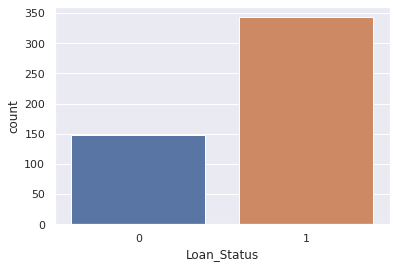

In [ ]:
sns.countplot(loan_data.Loan_Status)

In [ ]:
loan_data.Loan_Status.sum()/loan_data.shape[0]

0.6985743380855397

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [ ]:
loan_data.nunique()

Gender                 3
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      408
CoapplicantIncome    239
LoanAmount           176
Loan_Amount_Term      10
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
test_data.shape

(123, 12)

In [ ]:
loan_data.drop(['Loan_ID','Unnamed: 0'], axis=1, inplace=True)
test_data.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
gender_imputer = SimpleImputer(strategy='constant', fill_value='Not_Specified')
loan_data.Gender = gender_imputer.fit_transform(loan_data[['Gender']])
test_data.Gender = gender_imputer.transform(test_data[['Gender']])

married_imputer = SimpleImputer(strategy='constant', fill_value='No')
loan_data.Married = married_imputer.fit_transform(loan_data[['Married']])
test_data.Married = married_imputer.transform(test_data[['Married']])

Dependents_imputer = SimpleImputer(strategy='most_frequent')
loan_data.Dependents = Dependents_imputer.fit_transform(loan_data[['Dependents']])
test_data.Dependents = Dependents_imputer.transform(test_data[['Dependents']])

Self_Employed_imputer = SimpleImputer(strategy='constant', fill_value='No')
loan_data.Self_Employed = Self_Employed_imputer.fit_transform(loan_data[['Self_Employed']])
test_data.Self_Employed = Self_Employed_imputer.transform(test_data[['Self_Employed']])

Credit_History_imputer = SimpleImputer(strategy='constant', fill_value=2)
loan_data.Credit_History = Credit_History_imputer.fit_transform(loan_data[['Credit_History']])
test_data.Credit_History = Credit_History_imputer.transform(test_data[['Credit_History']])

LoanAmount_imputer = SimpleImputer(strategy='median')
loan_data.LoanAmount = LoanAmount_imputer.fit_transform(loan_data[['LoanAmount']])
test_data.LoanAmount = LoanAmount_imputer.transform(test_data[['LoanAmount']])

Loan_Amount_Term_imputer = SimpleImputer(strategy='most_frequent')
loan_data.Loan_Amount_Term = Loan_Amount_Term_imputer.fit_transform(loan_data[['Loan_Amount_Term']])
test_data.Loan_Amount_Term = Loan_Amount_Term_imputer.transform(test_data[['Loan_Amount_Term']])

In [ ]:
loan_data['income_loan']=loan_data.ApplicantIncome/loan_data.LoanAmount
test_data['income_loan']=test_data.ApplicantIncome/test_data.LoanAmount

In [ ]:
loan_data.drop('income_loan', axis=1, inplace=True)
test_data.drop('income_loan', axis=1, inplace=True)

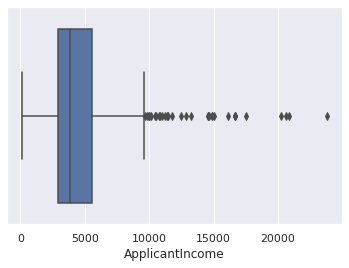

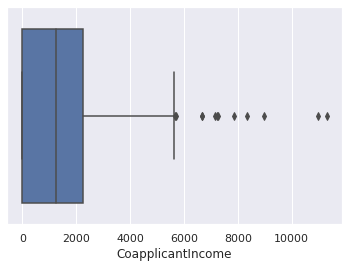

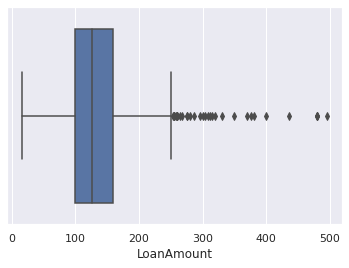

In [ ]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for feature in cols:
  sns.boxplot(x = loan_data[feature])
  plt.show()

In [ ]:
loan_data = loan_data[loan_data.ApplicantIncome<30000]
loan_data = loan_data[loan_data.CoapplicantIncome<30000]
loan_data = loan_data[loan_data.LoanAmount<500]
loan_data.shape

(480, 12)

In [ ]:
loan_data[loan_data.CoapplicantIncome>30000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
287,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,2.0,Urban,0
489,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [ ]:
loan_data[loan_data.LoanAmount>500]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
59,Not_Specified,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,1
158,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,1
255,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,2.0,Urban,1
384,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,1


In [ ]:
loan_data[loan_data["CoapplicantIncome"]==0].Loan_Status.value_counts()

1    138
0     77
Name: Loan_Status, dtype: int64

In [ ]:
loan_data[loan_data["CoapplicantIncome"]>0].Loan_Status.value_counts()

1    205
0     71
Name: Loan_Status, dtype: int64

In [ ]:
X = loan_data.drop('Loan_Status',axis=1)
y = loan_data.Loan_Status
X_test = test_data.copy()

In [ ]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Gender_Not_Specified,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Credit_History_2.0
0,4547,0.0,115.0,360.0,0,0,0,0,0,0,0,0,1,0,1,0
1,5703,0.0,130.0,360.0,1,0,1,0,0,1,1,1,0,0,1,0
2,4333,2451.0,110.0,360.0,0,0,1,0,0,0,0,0,0,1,1,0
3,4695,0.0,96.0,360.0,1,0,1,0,0,0,1,1,0,1,1,0
4,6700,1750.0,230.0,300.0,1,0,1,0,1,0,0,0,1,0,1,0


In [ ]:
X_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Gender_Not_Specified,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0,Credit_History_2.0
0,3748,1668.0,110.0,360.0,1,0,0,0,0,0,1,0,1,0,1,0
1,4000,7750.0,290.0,360.0,1,0,1,0,0,1,0,0,1,0,1,0
2,2625,6250.0,187.0,360.0,1,0,1,0,0,0,0,0,0,0,1,0
3,3902,1666.0,109.0,360.0,1,0,0,0,0,0,1,0,0,0,1,0
4,6096,0.0,218.0,360.0,1,0,1,0,0,0,1,0,0,0,0,0


# Label encode

In [ ]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
le = LabelEncoder()
for i in cat_cols:
  X[i] = le.fit_transform(X[i])
  X_test[i] = le.transform(X_test[i])

# sklearn one hot, return numpy

In [ ]:
# cat_cols = loan_data.select_dtypes(include = 'object').columns 
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
cat_train = X[cat_cols]
cat_test = test_data[cat_cols]

ohe = OneHotEncoder(sparse=False,)
encoded_train = ohe.fit_transform(cat_train)
encoded_test = ohe.transform(cat_test)

X.drop(cat_cols, axis=1, inplace=True)
X_test.drop(cat_cols, axis=1, inplace=True)

X = np.concatenate((X.values, encoded_train), axis=1)
X_test = np.concatenate((X_test.values, encoded_test), axis=1)

# pandas one hot, return dataframe

In [ ]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
X = pd.get_dummies(X, columns=cat_cols,drop_first=False)
X_test = pd.get_dummies(test_data, columns=cat_cols, drop_first=True)
columns = X.columns

In [ ]:
selector = SelectKBest(f_classif, k=10)  
X = selector.fit_transform(X, y)
X_test = selector.transform(X_test)

In [ ]:
X.shape

(480, 11)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.0001, random_state = 0)

In [ ]:
sm = SMOTE(random_state = 25, ratio = 1.0)  
X_train, y_train = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

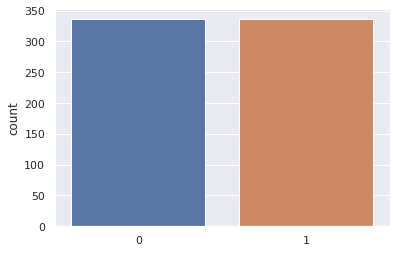

In [ ]:
sns.countplot(y_train)

In [ ]:
def evaluate(model):
  model.fit(X_train, y_train)
  a = accuracy_score(y_train, model.predict(X_train))
  f = f1_score(y_train, model.predict(X_train))
  print ("training accuracy is {:.2f} and f1 score is {:.2f}\n".format(a,f))
  print(confusion_matrix(y_train, model.predict(X_train)))
  a = accuracy_score(y_valid, model.predict(X_valid))
  f = f1_score(y_valid, model.predict(X_valid))
  print ("valid accuracy is {:.2f} and f1 score is {:.2f}\n".format(a,f))
  print(confusion_matrix(y_valid, model.predict(X_valid)))

def prediction(model, test_data):
  target = model.predict(test_data)
  res = pd.DataFrame(target)
  res.columns = ["prediction"]
  res.to_csv('prediction_results.csv', index=False)  
  print('file created')       
  files.download('prediction_results.csv')

In [ ]:
forest_model = RandomForestClassifier(random_state = 0)
evaluate(forest_model)

training accuracy is 1.00 and f1 score is 1.00

[[343   0]
 [  0 343]]
valid accuracy is 0.00 and f1 score is 0.00

[[0 1]
 [0 0]]


In [ ]:
# forest_model.fit(X,y)
prediction(forest_model, X_test)

file created


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
xgb_model = XGBClassifier(random_state = 0, n_estimators=100)
evaluate(xgb_model)

training accuracy is 0.90 and f1 score is 0.90

[[279  64]
 [  7 336]]
valid accuracy is 0.00 and f1 score is 0.00

[[0 1]
 [0 0]]


In [ ]:
# xgb_model.fit(X,y)
prediction(xgb_model, X_test)

file created


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

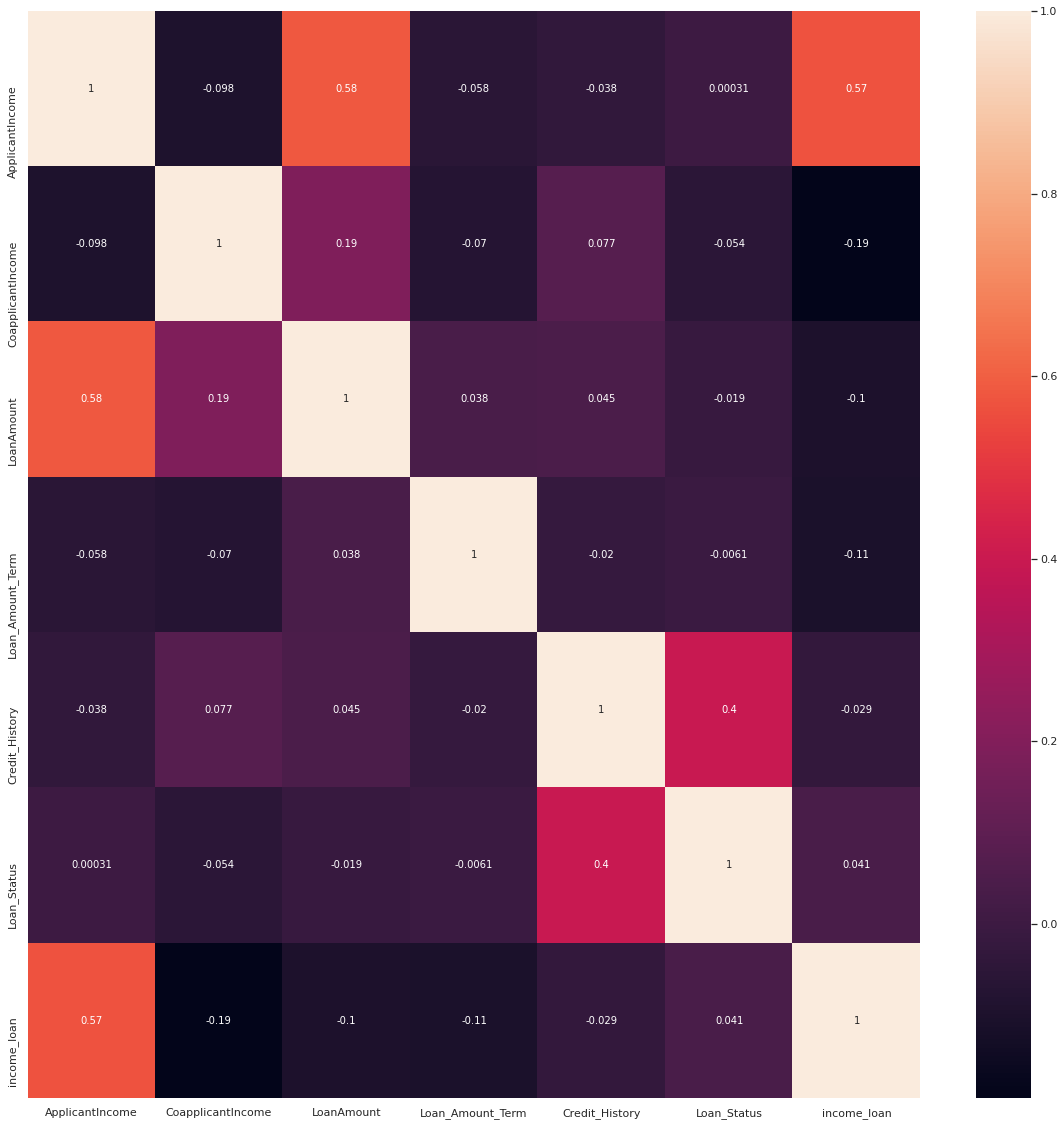

In [ ]:
correlations = loan_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True)

In [ ]:
with open('loan_model.pickle','wb') as f:
    pickle.dump(forest_model,f)

In [ ]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,4547,0.0,115.0,360.0,1,1
1,1,1,3,1,1,5703,0.0,130.0,360.0,1,0
2,0,1,0,0,0,4333,2451.0,110.0,360.0,1,2
3,1,1,0,1,1,4695,0.0,96.0,360.0,1,2
4,1,1,2,0,0,6700,1750.0,230.0,300.0,1,1


In [ ]:
vals=np.array([0, 0, 3, 1, 1, 3000, 2000, 140, 360, 1, 2])
vals

array([   0,    0,    3,    1,    1, 3000, 2000,  140,  360,    1,    2])

In [ ]:
X_test[2]

array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.625e+03,
       6.250e+03, 1.870e+02, 3.600e+02, 1.000e+00, 0.000e+00])

In [ ]:
xgb_model.predict([X_test[2]])

array([1])

In [ ]:
xgb_model.predict([vals])

array([1])